In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
def get_grid(data, eps=0.4):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    grid = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
    for x in np.arange(x_min, x_max, eps):
        for y in np.arange(y_min, y_max, eps):
            grid = np.append(grid, [[x, y, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 0)
    return grid

In [3]:
np.seed = 100
train_data = np.random.uniform(low=-15, high=15, size=(20000, 16))
train_labels = np.array([])
for (x, y) in train_data[:, :2]:
    if (x*x/4 + y*y/9) < 16:
        train_labels = np.append(train_labels, 1)
    else:
        train_labels = np.append(train_labels, 0)
        
#print(train_labels)    

test_data = np.random.uniform(low=-15, high=15, size=(20000, 16))
test_labels = np.array([])
for (x, y) in test_data[:, :2]:
    if (x*x/4 + y*y/9) < 16:
        test_labels = np.append(test_labels, 1)
    else:
        test_labels = np.append(test_labels, 0)

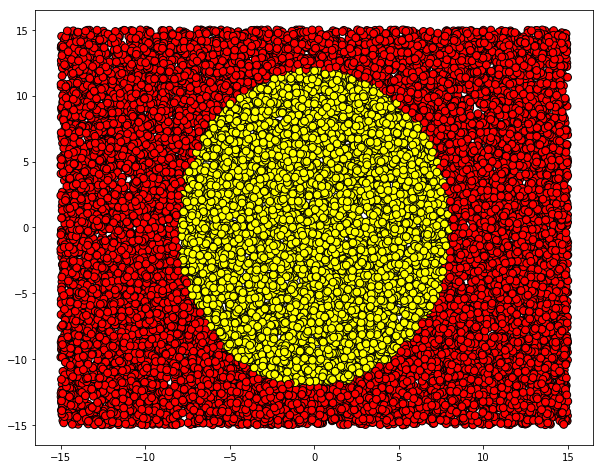

In [4]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=60, cmap='autumn', edgecolors='black')

In [28]:
tree = DecisionTreeClassifier(criterion="entropy", max_features=16, max_depth=20, min_samples_leaf=1)
tree.fit(train_data, train_labels)
print(tree.score(test_data, test_labels))

0.98975


In [29]:
points = get_grid(train_data)
predicted = tree.predict(points)

xx = points[:, 0]
yy = points[:, 1]
#plt.pcolormesh(predicted, cmap='autumn')
#plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=60, cmap='autumn', edgecolors='black');

In [30]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(tree, feature_names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00 O\x00\x00\n\x9c\x08\x06\x00\x00\x00\x1cr&\x9e\x00\x0…